<h1>Data Analytics Project</h1>
<h2>UK Road Accident Data Analysis</h2>
<h3>2019-2022</h3>
<h4>Analyst: Clark</h4>
<hr>

<h3>Importing Libraries</h3>

In [103]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [104]:
accident = pd.read_csv('dataset//accident_data.csv')
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [105]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [106]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [107]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [108]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')
accident['Index'] = accident['Index'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident.dtypes

Index                            category
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

### 1. What accident severity level has the most deaths on average?
<p>The Fatal Severity level has on average claimed the most lives with an average of 1.90 deaths for every accident.</p>
<hr>

In [109]:
# Average casualties between per accident severity
insightOne = accident.groupby(['Accident_Severity'])['Number_of_Casualties'].mean()
np.round(insightOne,2)

Accident_Severity
Fatal      1.90
Serious    1.47
Slight     1.33
Name: Number_of_Casualties, dtype: float64

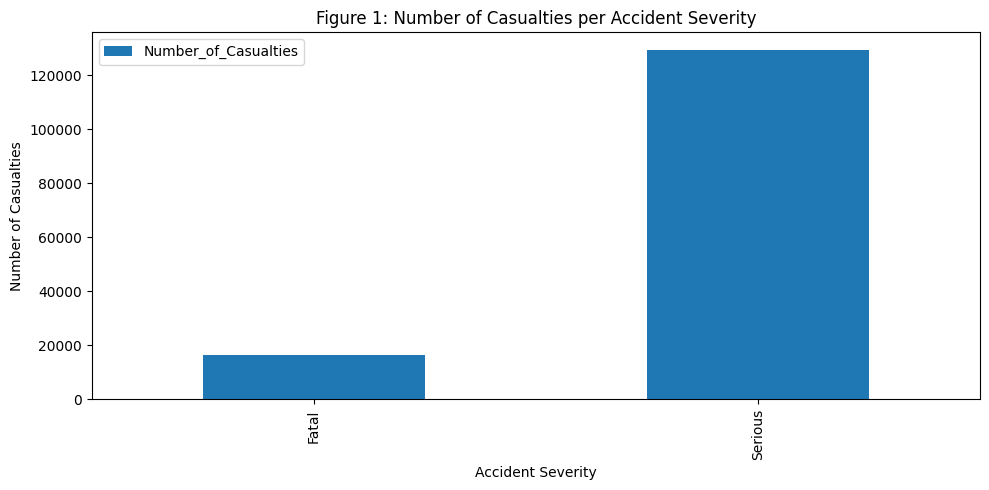

In [110]:
visual1 = accident.groupby(['Accident_Severity'])['Number_of_Casualties'].sum().reset_index()
# remove the slight accident severity because it is outlier
visual1 = visual1[visual1['Accident_Severity'] != 'Slight']
visual1.plot(kind='bar', x='Accident_Severity', y='Number_of_Casualties', figsize=(10,5))
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.title('Figure 1: Number of Casualties per Accident Severity')
plt.tight_layout()
plt.show()

<h3> 2. What vehicle type causes the least and most casualties?</h3>
<p>The vehicle type that causes the most deaths by a landslide are cars with 676,692. The least being ridden horses with 5, nice.</p>
<hr>

In [111]:
insightTwo = accident.groupby(['Vehicle_Type'])['Number_of_Casualties'].sum().sort_values(ascending=False)
insightTwo

Vehicle_Type
Car                                      676692
Van / Goods 3.5 tonnes mgw or under       46271
Bus or coach (17 or more pass seats)      34915
Motorcycle over 500cc                     34879
Goods 7.5 tonnes mgw and over             23397
Motorcycle 125cc and under                20348
Taxi/Private hire car                     18195
Motorcycle over 125cc and up to 500cc     10286
Motorcycle 50cc and under                 10167
Goods over 3.5t. and under 7.5t            8308
Other vehicle                              7554
Minibus (8 - 16 passenger seats)           2659
Agricultural vehicle                       2613
Pedal cycle                                 270
Data missing or out of range                  9
Ridden horse                                  5
Name: Number_of_Casualties, dtype: int64

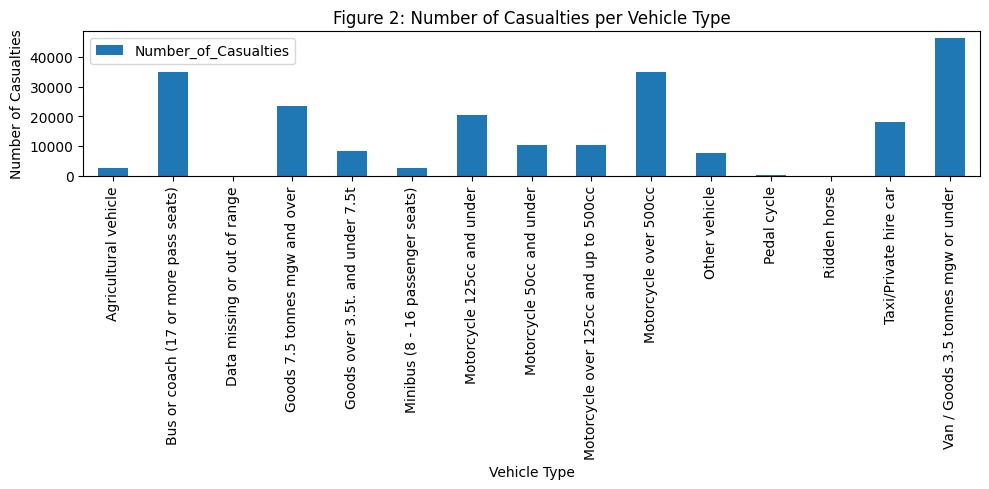

In [112]:
visual2 = accident.groupby(['Vehicle_Type'])['Number_of_Casualties'].sum().reset_index()
# remove car from the plot as it is outlier
visual2 = visual2[visual2['Vehicle_Type'] != 'Car']
visual2.plot(kind='bar', x='Vehicle_Type', y='Number_of_Casualties', figsize=(10,5))
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Casualties')
plt.title('Figure 2: Number of Casualties per Vehicle Type')
plt.tight_layout()
plt.show()

### 3. What is the road surface condition that has claimed the most / least lives on average?
<p>The road surface condition 'Flood over 3cm deep' has claimed the most lives overall, with 1.50 deaths per accident, while the 'Dry' road surface condition has the least lives claimed 1.30.</p>
<hr>

In [113]:
# what is the average number of casualties per road surface condition?
insightThree = accident.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].mean().sort_values(ascending=False)
np.round(insightThree,2)

Road_Surface_Conditions
Flood over 3cm. deep    1.50
Wet or damp             1.41
Snow                    1.36
Frost or ice            1.35
Dry                     1.33
Name: Number_of_Casualties, dtype: float64

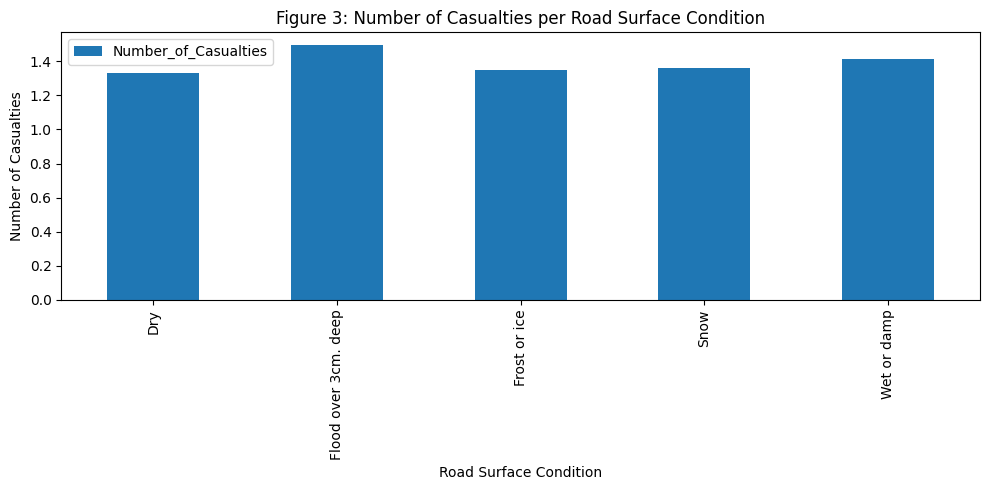

In [114]:
visual3 = accident.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].mean().reset_index()
visual3.plot(kind='bar', x='Road_Surface_Conditions', y='Number_of_Casualties', figsize=(10,5))
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Casualties')
plt.title('Figure 3: Number of Casualties per Road Surface Condition')
plt.tight_layout()
plt.show()

<h3>4. What weather condition has caused the most deaths?</h3>
<p>The weather condition that caused the most deaths is 'Fine no high winds'. This either means drivers in the UK are trigger happy with their cars or I'm currently assuming with barely enough info.</p>
<hr>

In [115]:
# what weather condition has caused the most deaths?
insightFour = accident.groupby(['Weather_Conditions'])['Number_of_Casualties'].sum().sort_values(ascending=False)
insightFour

Weather_Conditions
Fine no high winds       720875
Raining no high winds    112229
Other                     23236
Raining + high winds      13621
Fine + high winds         11856
Snowing no high winds      8370
Fog or mist                5126
Snowing + high winds       1255
Name: Number_of_Casualties, dtype: int64

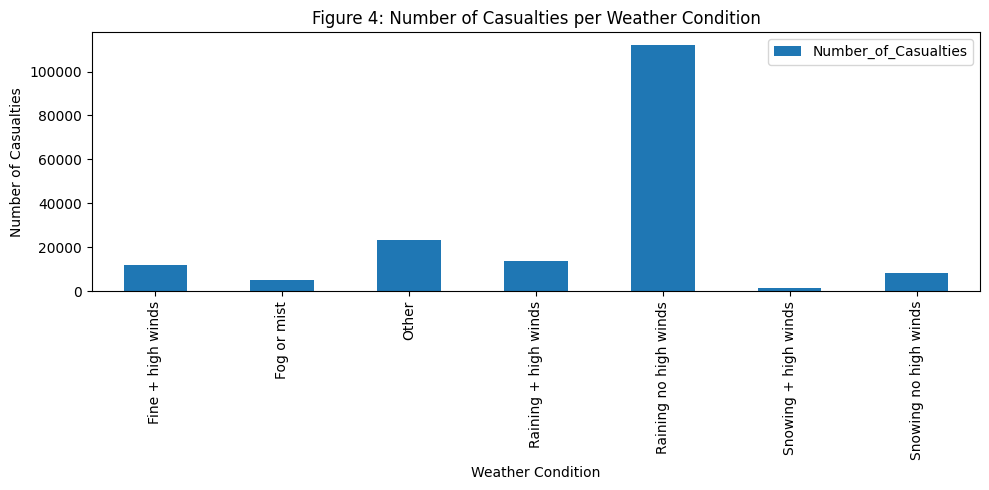

In [116]:
visual4 = accident.groupby(['Weather_Conditions'])['Number_of_Casualties'].sum().reset_index()
# removing fine no high winds as it is outlier
visual4 = visual4[visual4['Weather_Conditions'] != 'Fine no high winds']
visual4.plot(kind='bar', x='Weather_Conditions', y='Number_of_Casualties', figsize=(10,5))
plt.xlabel('Weather Condition')
plt.ylabel('Number of Casualties')
plt.title('Figure 4: Number of Casualties per Weather Condition')
plt.tight_layout()
plt.show()

In [117]:
# extracting year month day from the date
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23


<h3>5. What calendar year has caused the most accidents that caused deaths?</h3>
<p>The calendar year 2019 caused the most accidents with deaths of the 4 available years in the dataset.</p>
<hr>

In [118]:
# what year has the most accident deaths?
insightFive = accident.groupby(['Year'])['Number_of_Casualties'].sum().sort_values(ascending=False)
insightFive

Year
2019    247780
2020    230905
2021    222146
2022    195737
Name: Number_of_Casualties, dtype: int64

In [119]:
# extracting the severity levels from accident severity
accident['Serious'] = accident['Accident_Severity'].str.contains('Serious')
accident['Mild'] = accident['Accident_Severity'].str.contains('Mild')
accident['Slight'] = accident['Accident_Severity'].str.contains('Slight')

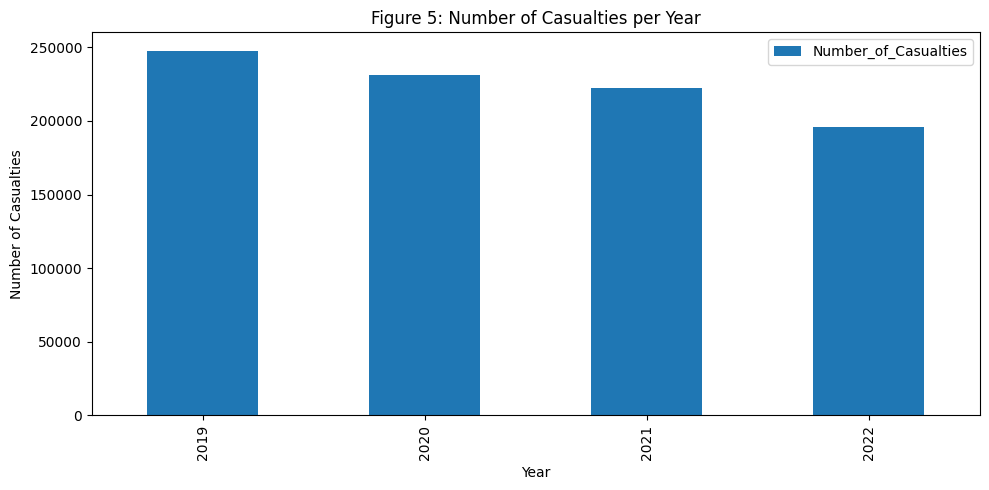

In [120]:
visual5 = accident.groupby(['Year'])['Number_of_Casualties'].sum().reset_index()
visual5.plot(kind='bar', x='Year', y='Number_of_Casualties', figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.title('Figure 5: Number of Casualties per Year')
plt.tight_layout()
plt.show()

<h3>6. What weather condition causes the most serious accidents?</h3>
<p>The weather condition that has caused the most serious severity level accidents, is surprisingly perfectly fine and no high wind weather. Interesting indeed.</p>
<hr>

In [121]:
# what weather condition causes the most serious accidents?
insightSix = accident.groupby(['Weather_Conditions'])['Serious'].sum().sort_values(ascending=False)
insightSix

Weather_Conditions
Fine no high winds       73285
Raining no high winds     9468
Other                     1801
Raining + high winds      1261
Fine + high winds         1245
Snowing no high winds      565
Fog or mist                483
Snowing + high winds       109
Name: Serious, dtype: int64

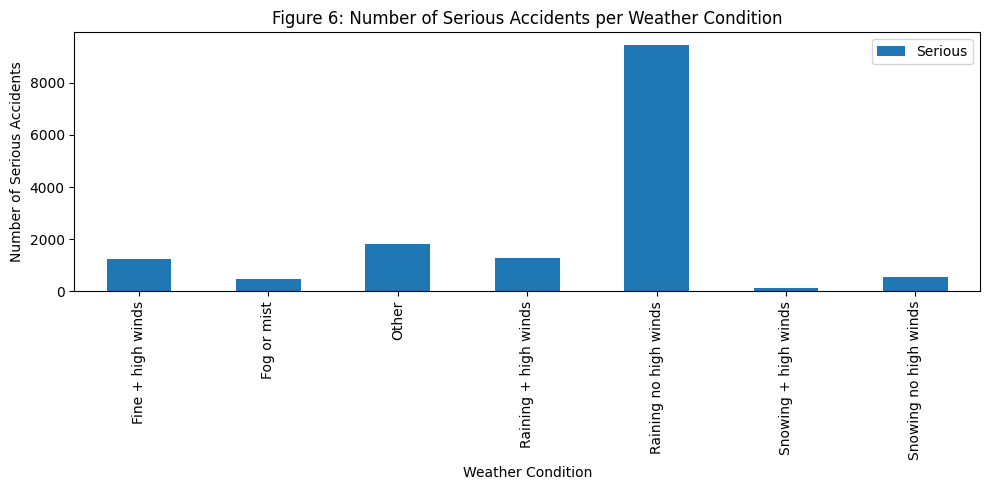

In [122]:
visual6 = accident.groupby(['Weather_Conditions'])['Serious'].sum().reset_index()
# removing fine no high winds as it is outlier
visual6 = visual6[visual6['Weather_Conditions'] != 'Fine no high winds']
visual6.plot(kind='bar', x='Weather_Conditions', y='Serious', figsize=(10,5))
plt.xlabel('Weather Condition')
plt.ylabel('Number of Serious Accidents')
plt.title('Figure 6: Number of Serious Accidents per Weather Condition')
plt.tight_layout()
plt.show()

In [123]:
# extracting light condition levels
accident['Daylight'] = accident['Light_Conditions'].str.contains('Daylight')
accident['Darkness'] = accident['Light_Conditions'].str.contains('Darkness')
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,...,Weather_Conditions,Vehicle_Type,Year,Month,Day,Serious,Mild,Slight,Daylight,Darkness
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,...,Fine no high winds,Car,2019,6,5,True,False,False,False,True
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,...,Raining no high winds,Car,2019,7,2,True,False,False,True,False
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,...,Fine no high winds,Taxi/Private hire car,2019,8,26,True,False,False,False,True
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,...,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,True,False,False,True,False
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,...,Fine no high winds,Other vehicle,2019,9,3,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,...,Fine no high winds,Car,2022,2,18,False,False,True,True,False
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,...,Fine no high winds,Car,2022,2,21,False,False,True,False,True
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,...,Fine no high winds,Car,2022,2,23,False,False,True,True,False
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,...,Fine no high winds,Motorcycle over 500cc,2022,2,23,True,False,False,False,True


<h3>7. What light condition level causes the least fatal accidents?</h3>
<p>The light condition 'Darkness - lights unlit', has caused the least amount of slight accidents.</p>
<hr>

In [124]:
# what light condition level has the least fatal accidents?
insightSeven = accident.groupby(['Light_Conditions'])['Slight'].sum().sort_values(ascending=True)
insightSeven

Light_Conditions
Darkness - lights unlit          2138
Darkness - lighting unknown      5622
Darkness - no lighting          28651
Darkness - lights lit          108345
Daylight                       419045
Name: Slight, dtype: int64

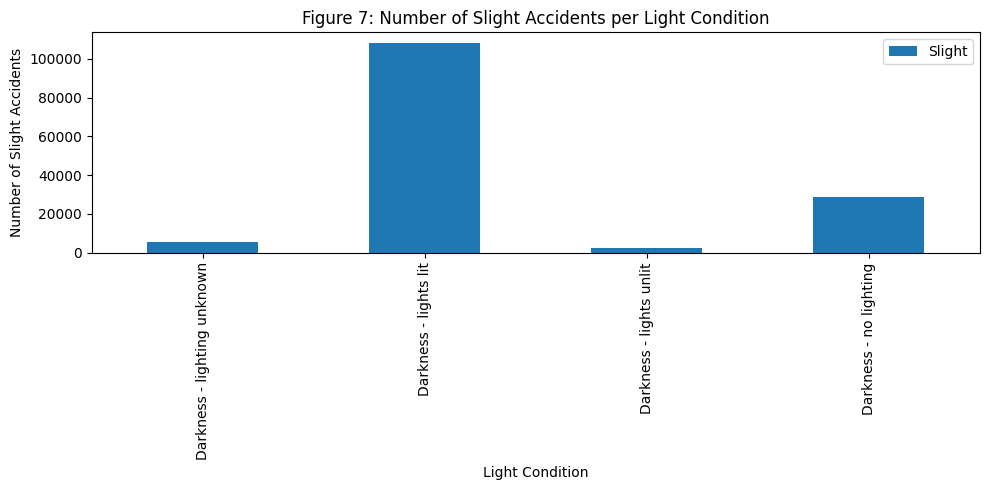

In [125]:
visual7 = accident.groupby(['Light_Conditions'])['Slight'].sum().reset_index()
# removing daylight as it is outlier
visual7 = visual7[visual7['Light_Conditions'] != 'Daylight']
visual7.plot(kind='bar', x='Light_Conditions', y='Slight', figsize=(10,5))
plt.xlabel('Light Condition')
plt.ylabel('Number of Slight Accidents')
plt.title('Figure 7: Number of Slight Accidents per Light Condition')
plt.tight_layout()
plt.show()

In [126]:
# extracting vehicle type levels
accident['Motorcycle'] = accident['Vehicle_Type'].str.contains('Motorcycle')
accident['Car'] = accident['Vehicle_Type'].str.contains('Car')
accident['Bus'] = accident['Vehicle_Type'].str.contains('Bus')
accident['Truck'] = accident['Vehicle_Type'].str.contains('Truck')
accident['Van'] = accident['Vehicle_Type'].str.contains('Van')
accident['Bicycle'] = accident['Vehicle_Type'].str.contains('Bicycle')
accident['Goods'] = accident['Vehicle_Type'].str.contains('Goods')
accident['Agricultural'] = accident['Vehicle_Type'].str.contains('Agricultural')
accident['Minibus'] = accident['Vehicle_Type'].str.contains('Minibus')

<h3>8. What vehicle type causes the most serious of accidents?</h3>
<p>The vehicle type that caused the most serious accidents the lot of times is the 'car' vehicle type.</p>
<hr>

In [127]:
# which vehicle type has the most fatal accidents?
insightEight = accident.groupby(['Vehicle_Type'])['Serious'].sum().sort_values(ascending=False)
insightEight

Vehicle_Type
Car                                      66461
Van / Goods 3.5 tonnes mgw or under       4554
Motorcycle over 500cc                     3457
Bus or coach (17 or more pass seats)      3373
Goods 7.5 tonnes mgw and over             2321
Motorcycle 125cc and under                2031
Taxi/Private hire car                     1771
Motorcycle 50cc and under                 1014
Motorcycle over 125cc and up to 500cc     1014
Goods over 3.5t. and under 7.5t            857
Other vehicle                              767
Agricultural vehicle                       282
Minibus (8 - 16 passenger seats)           276
Pedal cycle                                 39
Data missing or out of range                 0
Ridden horse                                 0
Name: Serious, dtype: int64

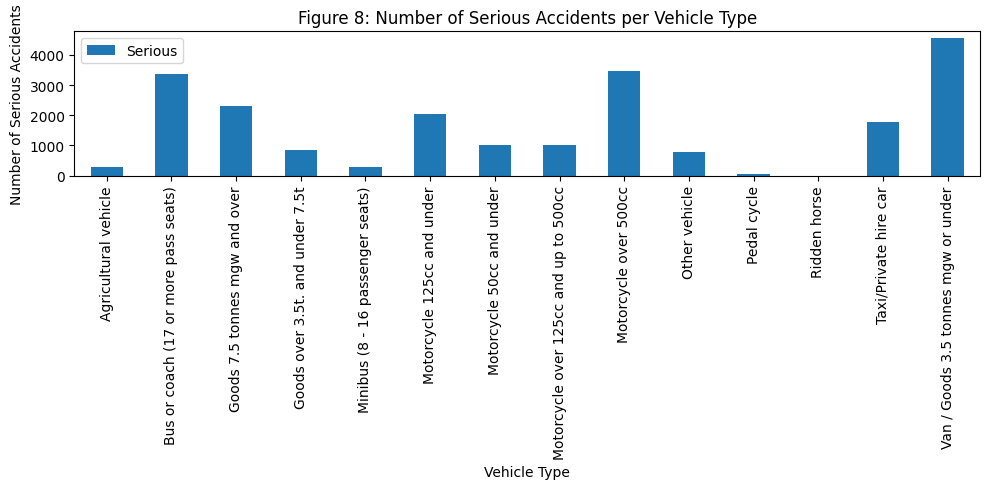

In [128]:
visual8 = accident.groupby(['Vehicle_Type'])['Serious'].sum().reset_index()
# removing car as it is outlier
visual8 = visual8[visual8['Vehicle_Type'] != 'Car']
# removing data missing out of range
visual8 = visual8[visual8['Vehicle_Type'] != 'Data missing or out of range']
visual8.plot(kind='bar', x='Vehicle_Type', y='Serious', figsize=(10,5))
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Serious Accidents')
plt.title('Figure 8: Number of Serious Accidents per Vehicle Type')
plt.tight_layout()
plt.show()

<h3>9. What road surface condition causes the most serious accidents?</h3>
<p>So apparently, the 'Dry' road surface condition casues the most serious accidents. Almost 3x as much as the Wet or Damp road condition.</p>
<hr>

In [129]:
# what road surface condition has the most fatal accidents?
insightNine = accident.groupby(['Road_Surface_Conditions'])['Serious'].sum().sort_values(ascending=False)
insightNine

Road_Surface_Conditions
Dry                     61708
Wet or damp             23785
Frost or ice             2007
Snow                      565
Flood over 3cm. deep      152
Name: Serious, dtype: int64

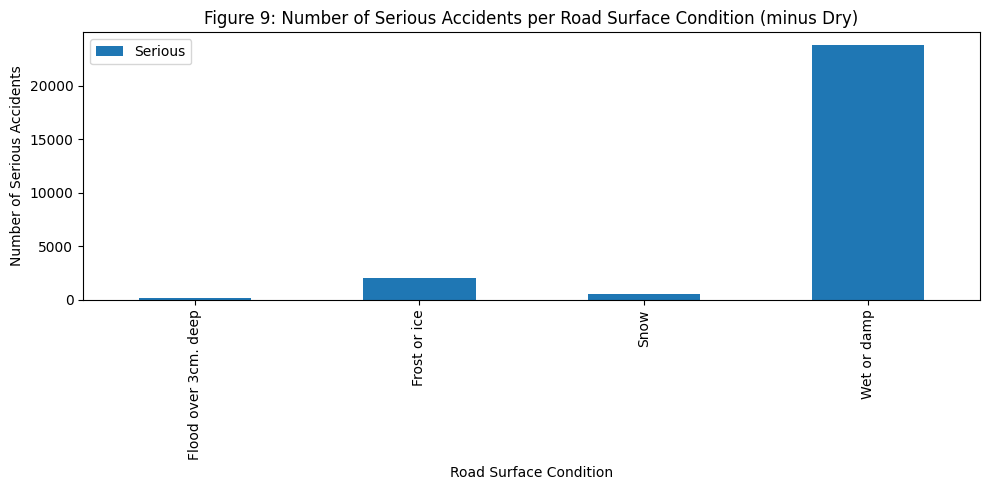

In [130]:
visual9 = accident.groupby(['Road_Surface_Conditions'])['Serious'].sum().reset_index()
# removing dry as it is outlier
visual9 = visual9[visual9['Road_Surface_Conditions'] != 'Dry']
visual9.plot(kind='bar', x='Road_Surface_Conditions', y='Serious', figsize=(10,5))
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Serious Accidents')
plt.title('Figure 9: Number of Serious Accidents per Road Surface Condition (minus Dry)')
plt.tight_layout()
plt.show()

<h3>10. What road type causes the most 'car' vehicle type accidents?</h3>
<p>Out of all road types, the Single carriageway causes the most 'car' accidents with a massive 374,000.</p>
<hr>

In [131]:
# what road type causes car vehicle type to be more accident prone?
insightTen = accident.groupby(['Road_Type'])['Car'].sum().sort_values(ascending=False)
insightTen

Road_Type
Single carriageway    374464
Dual carriageway       74820
Roundabout             33187
One way street         10223
Slip road               5298
Name: Car, dtype: int64

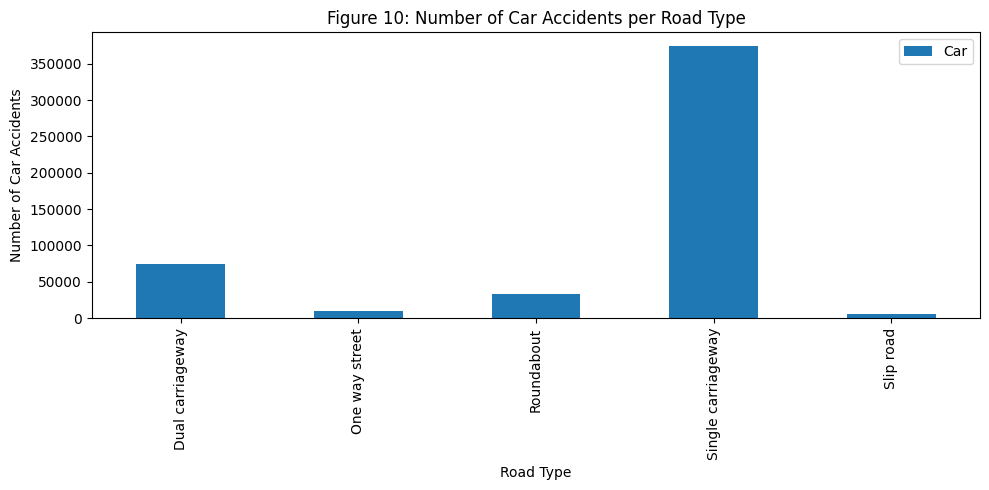

In [132]:
visual10 = accident.groupby(['Road_Type'])['Car'].sum().reset_index()
visual10.plot(kind='bar', x='Road_Type', y='Car', figsize=(10,5))
plt.xlabel('Road Type')
plt.ylabel('Number of Car Accidents')
plt.title('Figure 10: Number of Car Accidents per Road Type')
plt.tight_layout()
plt.show()

<h3>11. What weather condition causes motorcycles to experience an accident more than any other?</h3>
<p>Interestingly enough, a perfectly fine weather has caused more accidents than any other weather condition.</p>
<hr>

In [133]:
# what weather condition causes motorcycles to be more accident prone?
insightEleven = accident.groupby(['Weather_Conditions'])['Motorcycle'].sum().sort_values(ascending=False)
insightEleven

Weather_Conditions
Fine no high winds       45593
Raining no high winds     6755
Other                     1444
Raining + high winds       798
Fine + high winds          688
Snowing no high winds      547
Fog or mist                295
Snowing + high winds        65
Name: Motorcycle, dtype: int64

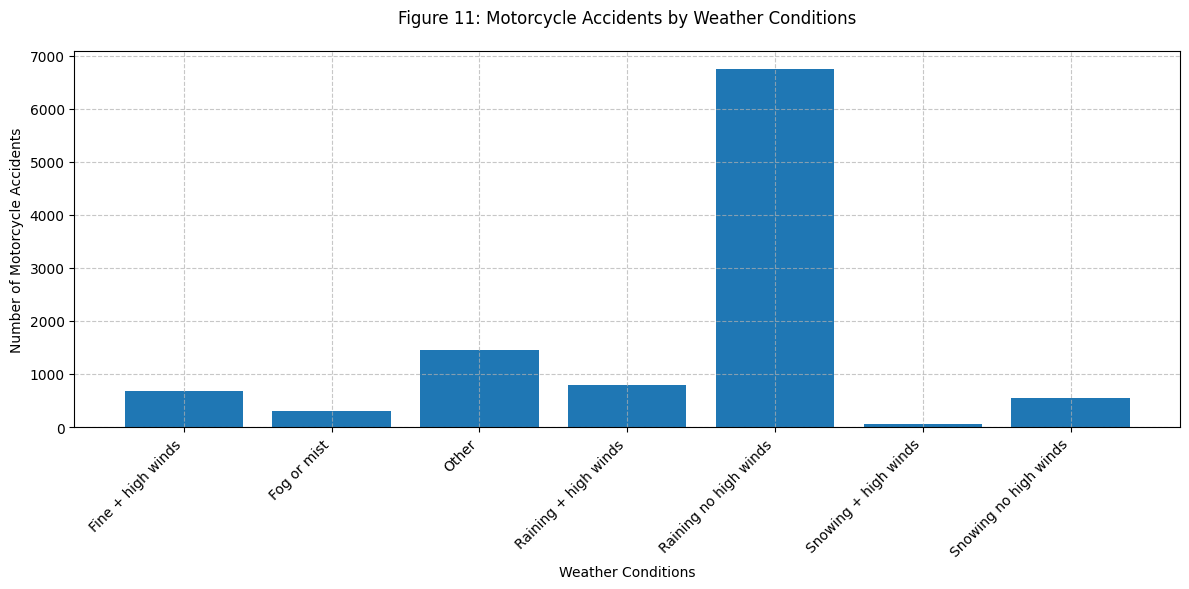

In [134]:
visual11 = accident.groupby(['Weather_Conditions'])['Motorcycle'].sum().reset_index()
# removing fine no high winds because it is an outlier
visual11 = visual11[visual11['Weather_Conditions'] != 'Fine no high winds']

plt.figure(figsize=(12, 6))
plt.bar(visual11['Weather_Conditions'], visual11['Motorcycle'])
plt.title('Figure 11: Motorcycle Accidents by Weather Conditions', pad=20)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Motorcycle Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>12. What severity level causes the most casualties?</h3>
<p>Interestingly, the data shows that the Slight severity level causes the most deaths with a whopping 750,000 casualties.</p>
<hr>

In [135]:
# what severity level causes the most deaths?
insightTwelve = accident.groupby(['Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False)
insightTwelve

Accident_Severity
Slight     750646
Serious    129439
Fatal       16483
Name: Number_of_Casualties, dtype: int64

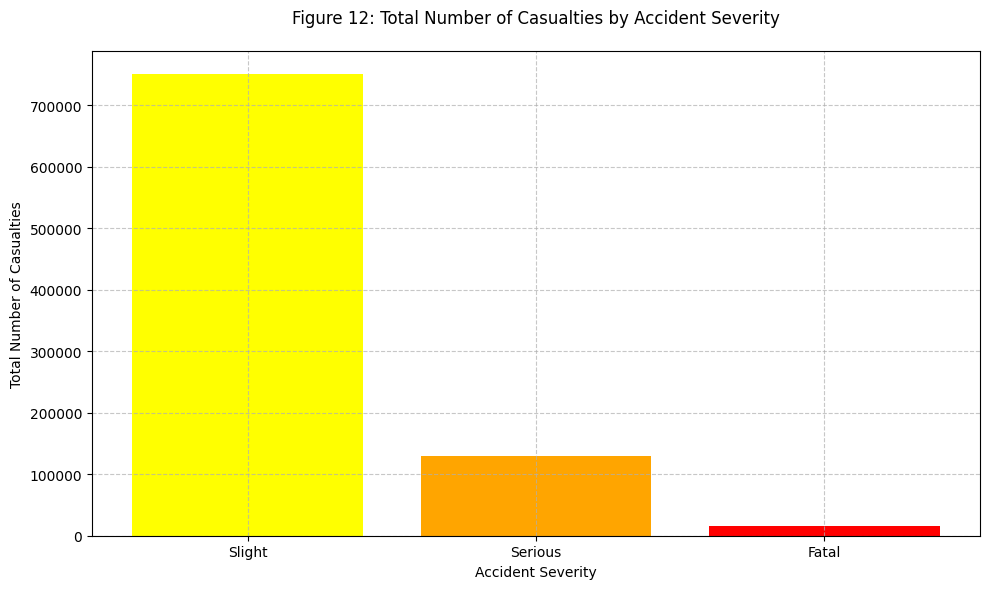

In [136]:
plt.figure(figsize=(10, 6))
plt.bar(insightTwelve.index, insightTwelve.values, color=['yellow', 'orange', 'red'])
plt.title('Figure 12: Total Number of Casualties by Accident Severity', pad=20)
plt.xlabel('Accident Severity')
plt.ylabel('Total Number of Casualties')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>13. What month has caused the least and most deaths?</h3>
<p>The month that has caused the most deaths in the Dataframe is the 11th Month, November. The least on the other hand being February the second month.</p>
<hr>


In [137]:
# what month has the most casualties?
insightThirteen = accident.groupby(['Month'])['Number_of_Casualties'].sum().sort_values(ascending=False)

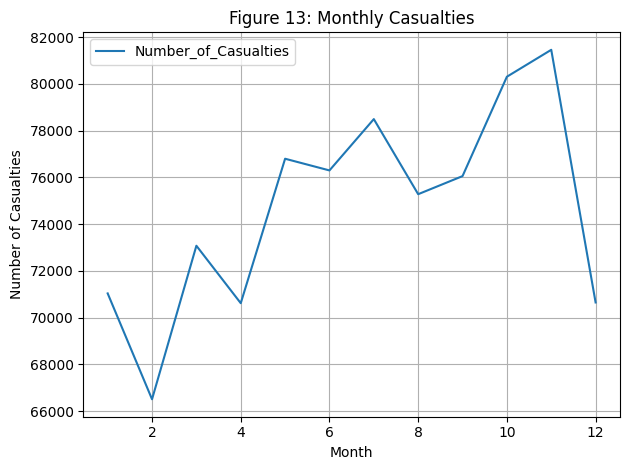

In [138]:
visual13 = accident.groupby(['Month'])['Number_of_Casualties'].sum().reset_index()
visual13.plot(kind='line', x='Month', y='Number_of_Casualties')
plt.title('Figure 13: Monthly Casualties')
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.grid(True)
plt.show()

### 14. Is there correlation between the vehicle type and the number of casualties it caused?
<p>There is no correlation between the type of vehicle and the number of casualties it caused.</p>
<hr>

In [139]:
# is there a correlation between the vehicle number with the number of casualties?
insightFourteen = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])
insightFourteen

0.22888886126927557

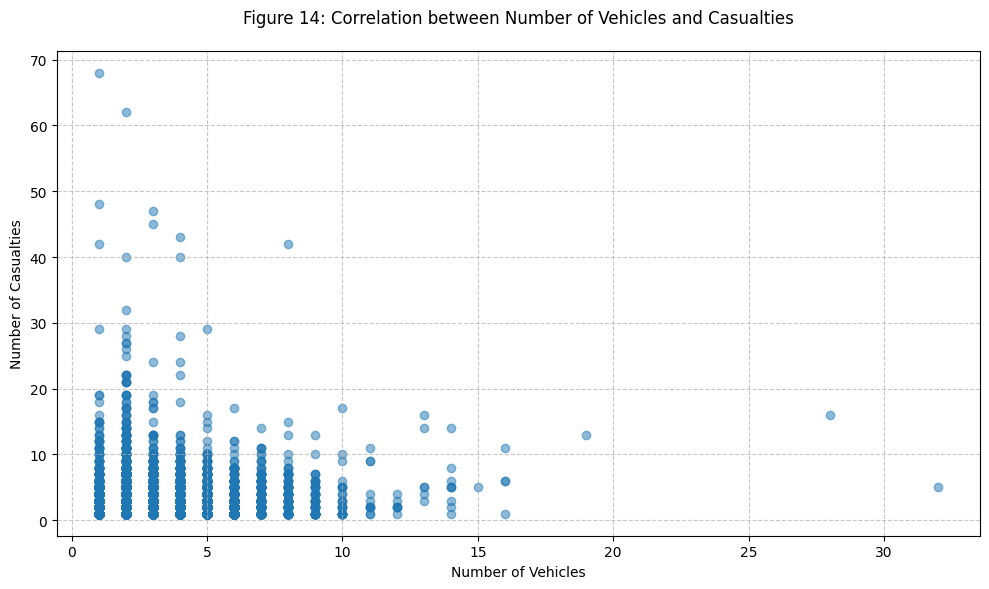

In [140]:
plt.figure(figsize=(10, 6))
plt.scatter(accident['Number_of_Vehicles'], accident['Number_of_Casualties'], alpha=0.5)
plt.title('Figure 14: Correlation between Number of Vehicles and Casualties', pad=20)
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 15. What area does accidents happen to occur more on? Is it rural or urban areas?
<p>Unsurprisingly for me, it shows that accidents occur more times in Urban areas rather in Rural.</p>
<hr>

In [141]:
# does accidents occur more on urban or rural areas?
insightFifteen = accident.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum().sort_values(ascending=False)
insightFifteen

Urban_or_Rural_Area
Urban          543040
Rural          353515
Unallocated        13
Name: Number_of_Casualties, dtype: int64

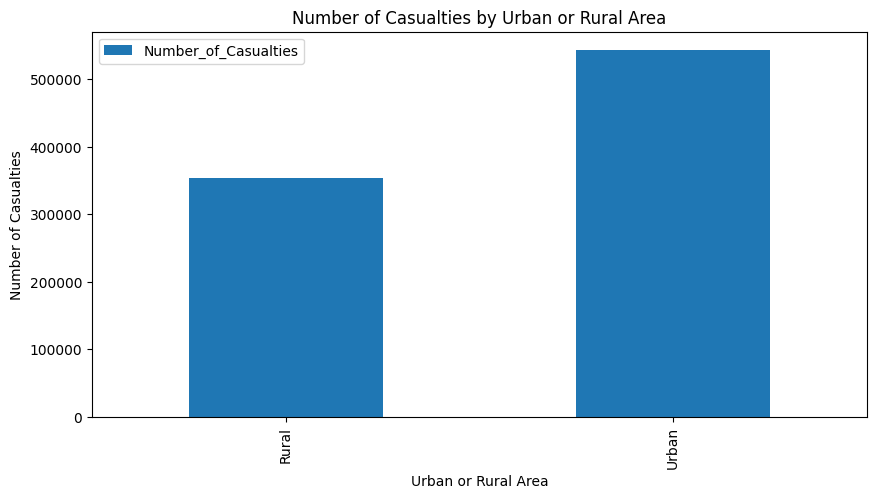

In [142]:
visual15 = accident.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum().reset_index()
# removing unallocated as it is negligible
visual15 = visual15[visual15['Urban_or_Rural_Area'] != 'Unallocated']
visual15.plot(kind='bar', x='Urban_or_Rural_Area', y='Number_of_Casualties', figsize=(10,5))
plt.xlabel('Urban or Rural Area')
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties by Urban or Rural Area')
plt.show()

### 16. What is the average number of casualties per road type?
<p>The road type that causes the most deaths on average is the dual carriageway roadtype with 1.48 deaths. The least being the one way street with 1.19. I find it interesting that none of the road types went under 1 though.</p>
<hr>

In [143]:
# what is the average number of casualties per road type?
insightSixteen = accident.groupby(['Road_Type'])['Number_of_Casualties'].mean().sort_values(ascending=False)
np.round(insightSixteen,2)

Road_Type
Dual carriageway      1.48
Slip road             1.42
Single carriageway    1.34
Roundabout            1.27
One way street        1.19
Name: Number_of_Casualties, dtype: float64

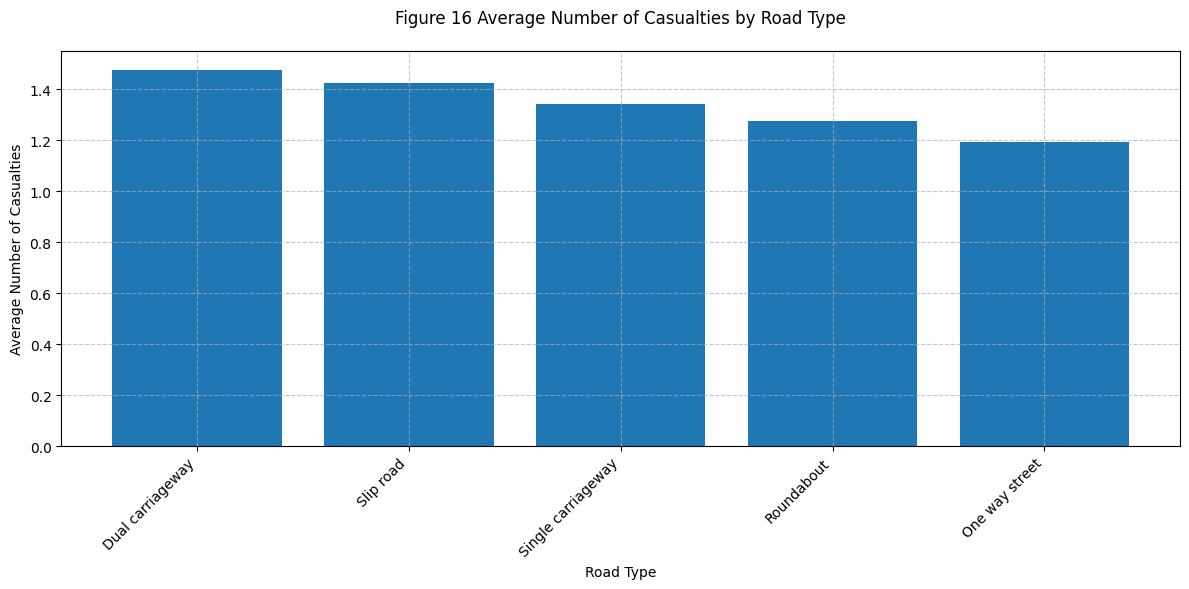

In [144]:
plt.figure(figsize=(12, 6))
plt.bar(insightSixteen.index, insightSixteen.values)
plt.title('Figure 16 Average Number of Casualties by Road Type', pad=20)
plt.xlabel('Road Type')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 17. What District Area is considered to be the most / least deadly?
<p>The district area that has claimed the most lives overall is the Birmingham with a whopping 18,674 deaths. While the area that has claimed the least lives is Clackmannanshire with only 115.</p>
<hr>

In [145]:
# what district area has the highest number of casualties?
insightSeventeen = accident.groupby(['District Area'])['Number_of_Casualties'].sum().sort_values(ascending=False)
insightSeventeen

District Area
Birmingham                   18674
Leeds                        12438
Manchester                    9437
Bradford                      9268
Liverpool                     8669
                             ...  
London Airport (Heathrow)      217
Clackmannshire                 204
Shetland Islands               202
Orkney Islands                 154
Clackmannanshire               115
Name: Number_of_Casualties, Length: 422, dtype: int64

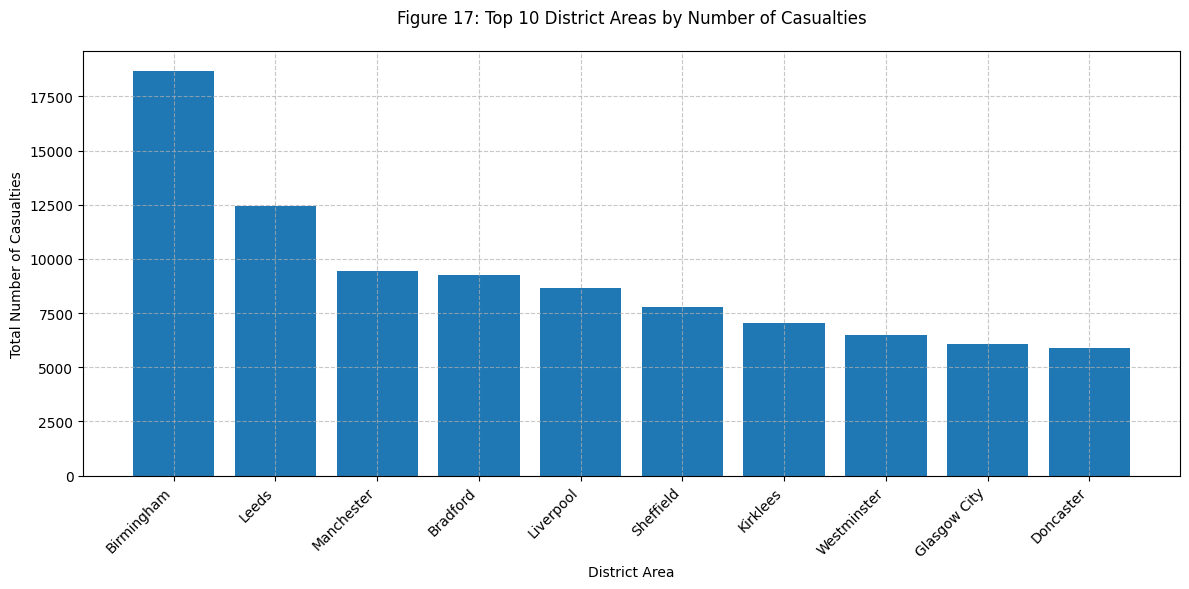

In [146]:
# Get top 10 districts for better visualization
top_10_districts = insightSeventeen.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_districts.index, top_10_districts.values)
plt.title('Figure 17: Top 10 District Areas by Number of Casualties', pad=20)
plt.xlabel('District Area')
plt.ylabel('Total Number of Casualties')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 18. Is there more vehicles in rural or in urban areas?
<p>There is a 41.6% increase in vehicle number in urban areas compared to rural areas. We can therefore infer the reason as to why there are more accidents in urban areas than in rural ones on average as we have seen from Insight 15, is somewhat due to the amount vehicles there.</p>
<hr>

In [147]:
# are there more vehicles in urban or rural areas?
insightEighteen = accident.groupby(['Urban_or_Rural_Area'])['Number_of_Vehicles'].sum().sort_values(ascending=False)
insightEighteen

Urban_or_Rural_Area
Urban          763821
Rural          446030
Unallocated        21
Name: Number_of_Vehicles, dtype: int64

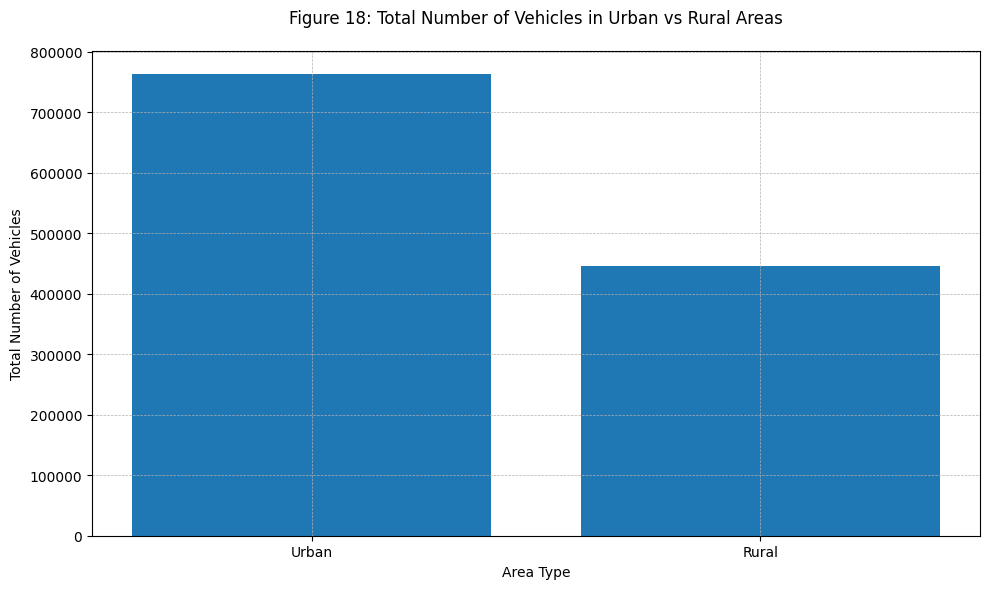

In [148]:
insightEighteen_filtered = insightEighteen[insightEighteen.index != 'Unallocated']

plt.figure(figsize=(10, 6))
plt.bar(insightEighteen_filtered.index, insightEighteen_filtered.values)
plt.title('Figure 18: Total Number of Vehicles in Urban vs Rural Areas', pad=20)
plt.xlabel('Area Type')
plt.ylabel('Total Number of Vehicles')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### 19. What type of vehicles are most prominent in Urban areas?
<p>The most common vehicle in urban areas is cars attributing to 162% more numerous than all other vehicle types combined. We can once again infer that Cars might be the primary vehicle that causes accidents in Urban areas.</p>
<hr>

In [149]:
# extracting urban or rural areas
accident['Urban'] = accident['Urban_or_Rural_Area'].str.contains('Urban')
accident['Rural'] = accident['Urban_or_Rural_Area'].str.contains('Rural')

In [150]:
# what is the most common vehicle type in urban areas?
insightNineteen = accident.groupby(['Vehicle_Type'])['Urban'].sum().sort_values(ascending=False)
insightNineteen

Vehicle_Type
Car                                      316062
Van / Goods 3.5 tonnes mgw or under       22003
Bus or coach (17 or more pass seats)      16851
Motorcycle over 500cc                     16700
Goods 7.5 tonnes mgw and over             11151
Motorcycle 125cc and under                10246
Taxi/Private hire car                      8617
Motorcycle over 125cc and up to 500cc      4982
Motorcycle 50cc and under                  4893
Goods over 3.5t. and under 7.5t            3864
Other vehicle                              3643
Agricultural vehicle                       1272
Minibus (8 - 16 passenger seats)           1258
Pedal cycle                                 127
Data missing or out of range                  6
Ridden horse                                  3
Name: Urban, dtype: int64

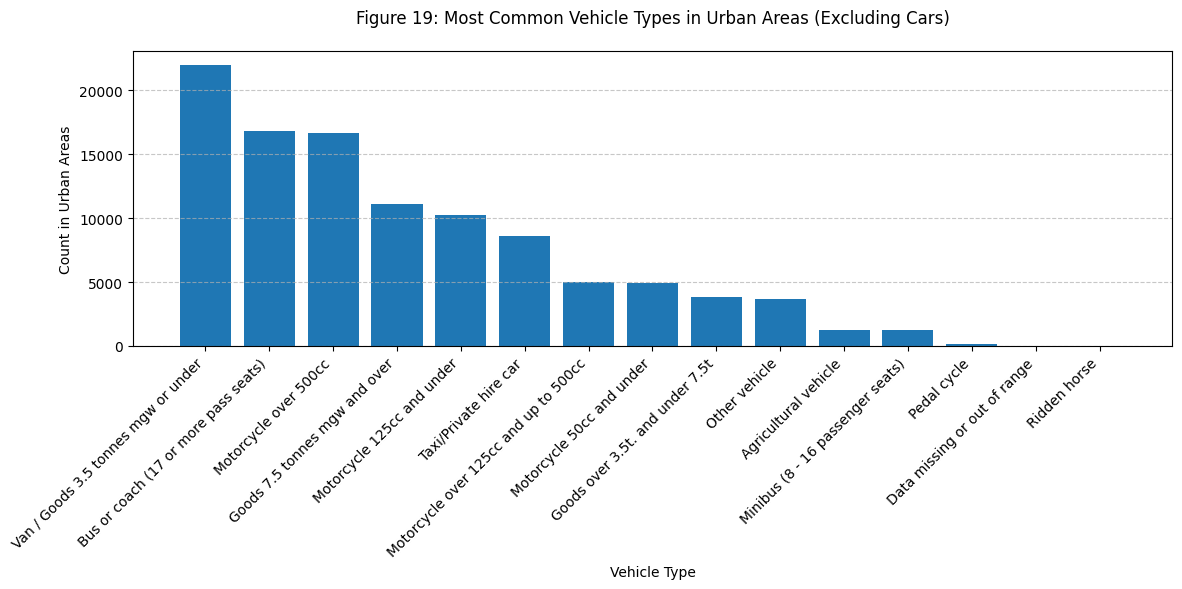

In [151]:
insightNineteen_filtered = insightNineteen[insightNineteen.index != 'Car']

plt.figure(figsize=(12, 6))
plt.bar(insightNineteen_filtered.index, insightNineteen_filtered.values)
plt.title('Figure 19: Most Common Vehicle Types in Urban Areas (Excluding Cars)', pad=20)
plt.xlabel('Vehicle Type')
plt.ylabel('Count in Urban Areas')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 20.How about in Rural areas? What vehicle type accounts for the majority?
<p>Similarly to the urban areas, the most populous vehicle type in rural areas is also the 'car'. Attributing to 76.4% of all the vehicles in rural areas. So does this also mean that cars are involved with the majority of accidents in rural areas as well? We'll see...</p>
<hr>

In [152]:
# what is the most common vehicle type in rural areas?
insightTwenty = accident.groupby(['Vehicle_Type'])['Rural'].sum().sort_values(ascending=False)
insightTwenty

Vehicle_Type
Car                                      181922
Van / Goods 3.5 tonnes mgw or under       12156
Bus or coach (17 or more pass seats)       9025
Motorcycle over 500cc                      8957
Goods 7.5 tonnes mgw and over              6156
Motorcycle 125cc and under                 5023
Taxi/Private hire car                      4677
Motorcycle 50cc and under                  2710
Motorcycle over 125cc and up to 500cc      2674
Goods over 3.5t. and under 7.5t            2232
Other vehicle                              1994
Minibus (8 - 16 passenger seats)            718
Agricultural vehicle                        675
Pedal cycle                                  70
Ridden horse                                  1
Data missing or out of range                  0
Name: Rural, dtype: int64

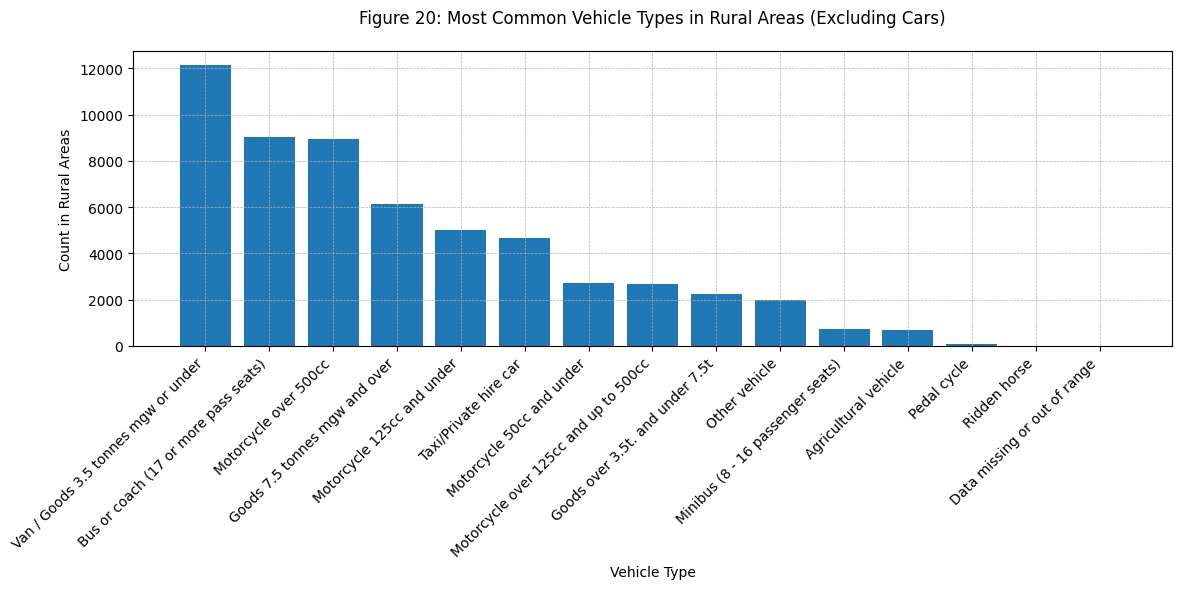

In [153]:
insightTwenty_filtered = insightTwenty[insightTwenty.index != 'Car']

plt.figure(figsize=(12, 6))
plt.bar(insightTwenty_filtered.index, insightTwenty_filtered.values)
plt.title('Figure 20: Most Common Vehicle Types in Rural Areas (Excluding Cars)', pad=20)
plt.xlabel('Vehicle Type')
plt.ylabel('Count in Rural Areas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### 21. What year did most accidents occur in rural areas?
<p>The year wherein the most accidents occured in rural areas is unsurprisingly during the year 2019, just a year before the pandeminc occured. But interestingly enough, during the pandemic period of 2020-2021, there is still a significant amount of accidents that occured than in 2022. Does this mean the UK's quarantine measures aren't that strict? Perhaps so...</p>
<hr>

In [154]:
# what year has the most casualties in rural areas?
insightTwentyOne = accident.groupby(['Year'])['Rural'].sum().sort_values(ascending=False)
insightTwentyOne

Year
2019    67558
2020    61991
2021    59016
2022    50425
Name: Rural, dtype: int64

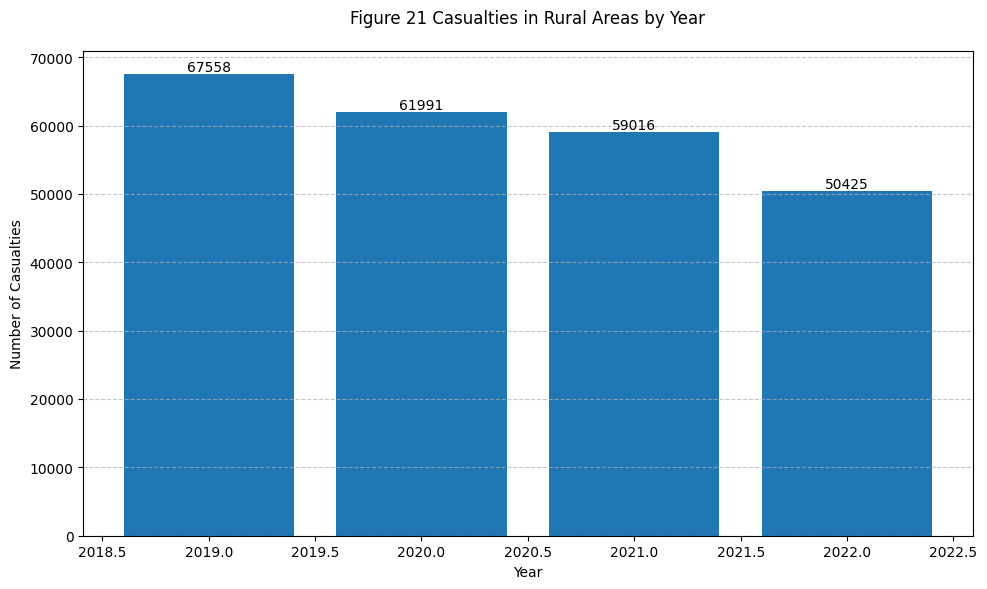

In [165]:
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(insightTwentyOne.index, insightTwentyOne.values)

# Customize the plot
plt.title('Figure 21 Casualties in Rural Areas by Year', pad=20)
plt.xlabel('Year')
plt.ylabel('Number of Casualties')

# Add value labels on top of each bar
for i, v in enumerate(insightTwentyOne.values):
    plt.text(insightTwentyOne.index[i], v, str(int(v)), 
             ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### 22. What year did most accidents occur in urban areas?
<p>I find it interesting that, while yes it is true that there is downtrend of accidents from 2019 to the pandemic period, it is not a massive enough jump aswell, similar to the previous insight. Only during the year 2022 did the number of accidents in urban areas went down to 5 digits rather than 6, which is saying something. I wonder what happened during that year?</p>
<hr>

In [156]:
# what year has the most accidents in urban areas?
insightTwentyTwo = accident.groupby(['Year'])['Urban'].sum().sort_values(ascending=False)
insightTwentyTwo

Year
2019    114552
2020    108594
2021    104538
2022     93994
Name: Urban, dtype: int64

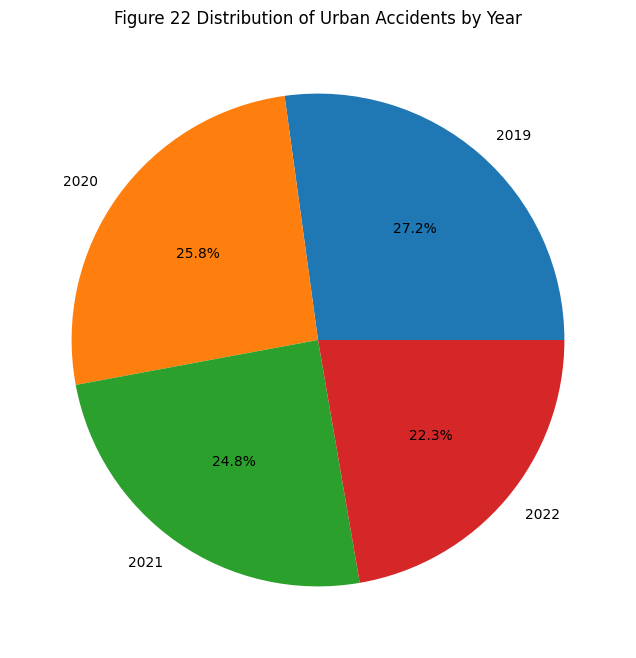

In [ ]:
# Extract year and count accidents in urban areas
plt.figure(figsize=(8, 8))
plt.pie(insightTwentyTwo.values, labels=insightTwentyTwo.index, autopct='%1.1f%%')
plt.title('Figure 22: Distribution of Urban Accidents by Year')
plt.show()

In [158]:
# extracting weather conditions
accident['Fine'] = accident['Weather_Conditions'].str.contains('Fine')
accident['Raining'] = accident['Weather_Conditions'].str.contains('Raining')
accident['Snowing'] = accident['Weather_Conditions'].str.contains('Snowing')
accident['Fog'] = accident['Weather_Conditions'].str.contains('Fog or mist')

### 23. What is the most common weather condition in Urban areas?
<p>The most common weather condition in urban areas is 'fine no high winds', which is interesting because this makes it difficult to explain why the accidents are so high in number if the weather conditions are perfect most of the time. I guess British drivers are just trigger happy with their accelerate pedal.</p>
<hr>

In [159]:
# what is the most common weather condition in urban areas?
insightTwentyThree = accident.groupby(['Urban'])['Weather_Conditions'].value_counts().sort_values(ascending=False)
insightTwentyThree

Urban  Weather_Conditions   
True   Fine no high winds       349250
False  Fine no high winds       185763
True   Raining no high winds     48518
False  Raining no high winds     31178
True   Other                      9813
False  Other                      7337
True   Raining + high winds       4892
False  Raining + high winds       4723
True   Fine + high winds          4560
False  Fine + high winds          3994
True   Snowing no high winds      3188
False  Snowing no high winds      3050
       Fog or mist                2385
True   Fog or mist                1143
False  Snowing + high winds        571
True   Snowing + high winds        314
Name: count, dtype: int64

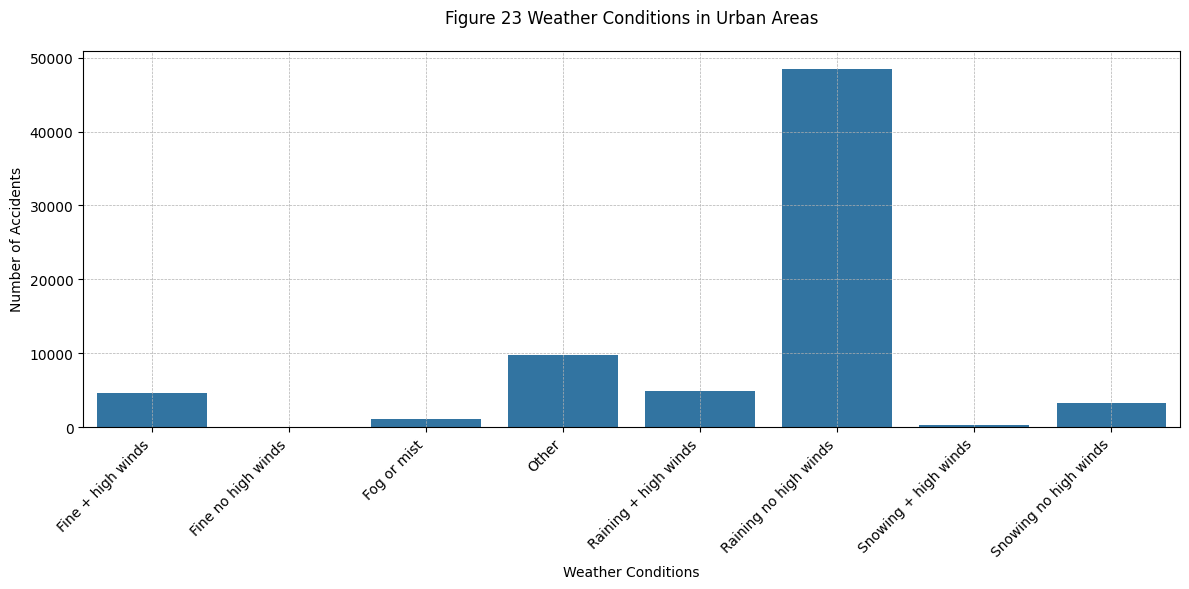

In [ ]:
weather_urban = accident[accident['Urban_or_Rural_Area'] == 'Urban']['Weather_Conditions'].value_counts().reset_index()
weather_urban = weather_urban[weather_urban['Weather_Conditions'] != 'Fine no high winds']
weather_urban.columns = ['Weather_Conditions', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=weather_urban, x='Weather_Conditions', y='Count')
plt.title('Figure 23: Weather Conditions in Urban Areas', pad=20)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### 24. What is the most common weather condition in rural areas?
<p>Similarly to urban, the most common weather condition in rural areas is also 'fine no high winds'. But their accident counts are significantly smaller in comparison to the urban areas. This may be attributed to the vehicle counts in both areas, wherein we know from previous insights that rural areas have far less. So maybe the rural area people are just chill dudes, and the urban areas are like the wannabe next MAX VERSTAPPEN.</p>
<hr>

In [161]:
# what is the most common weather condition in rural areas?
insightTwentyFour = accident.groupby(['Rural'])['Weather_Conditions'].value_counts().sort_values(ascending=False)
insightTwentyFour

Rural  Weather_Conditions   
False  Fine no high winds       349255
True   Fine no high winds       185758
False  Raining no high winds     48523
True   Raining no high winds     31173
False  Other                      9813
True   Other                      7337
False  Raining + high winds       4892
True   Raining + high winds       4723
False  Fine + high winds          4561
True   Fine + high winds          3993
False  Snowing no high winds      3188
True   Snowing no high winds      3050
       Fog or mist                2385
False  Fog or mist                1143
True   Snowing + high winds        571
False  Snowing + high winds        314
Name: count, dtype: int64

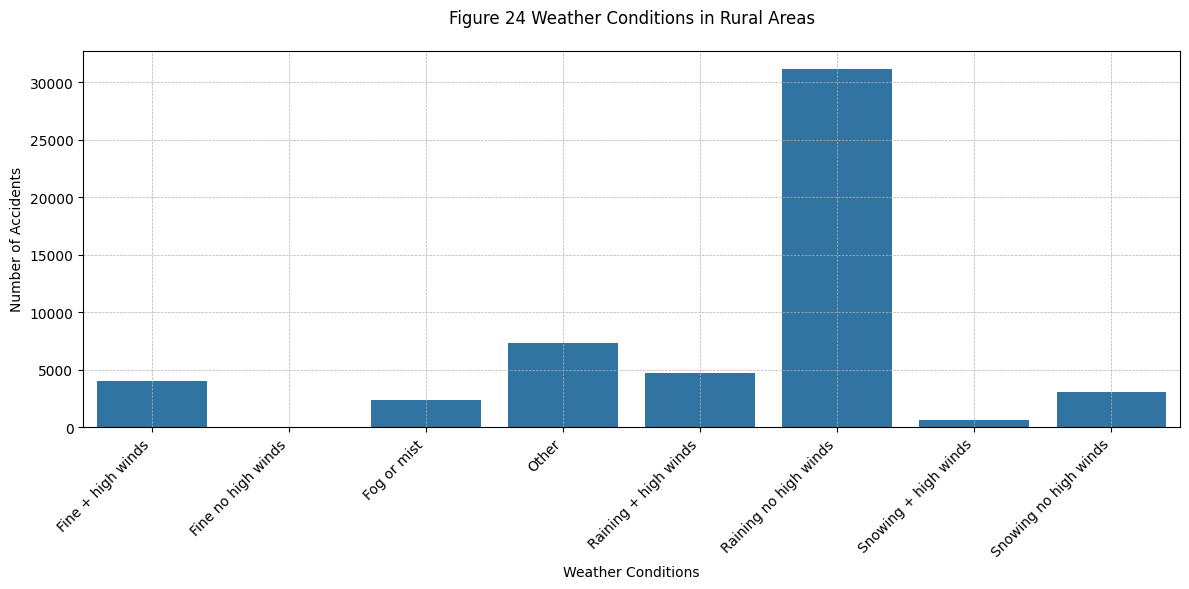

In [ ]:
weather_rural = accident[accident['Urban_or_Rural_Area'] == 'Rural']['Weather_Conditions'].value_counts().reset_index()
weather_rural = weather_rural[weather_rural['Weather_Conditions'] != 'Fine no high winds']
weather_rural.columns = ['Weather_Conditions', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=weather_rural, x='Weather_Conditions', y='Count')
plt.title('Figure 24: Weather Conditions in Rural Areas', pad=20)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [163]:
area_year = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')
pivot_table = area_year.pivot(index='Year', columns='District Area', values = 'Accident_Count')
pivot_table


District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


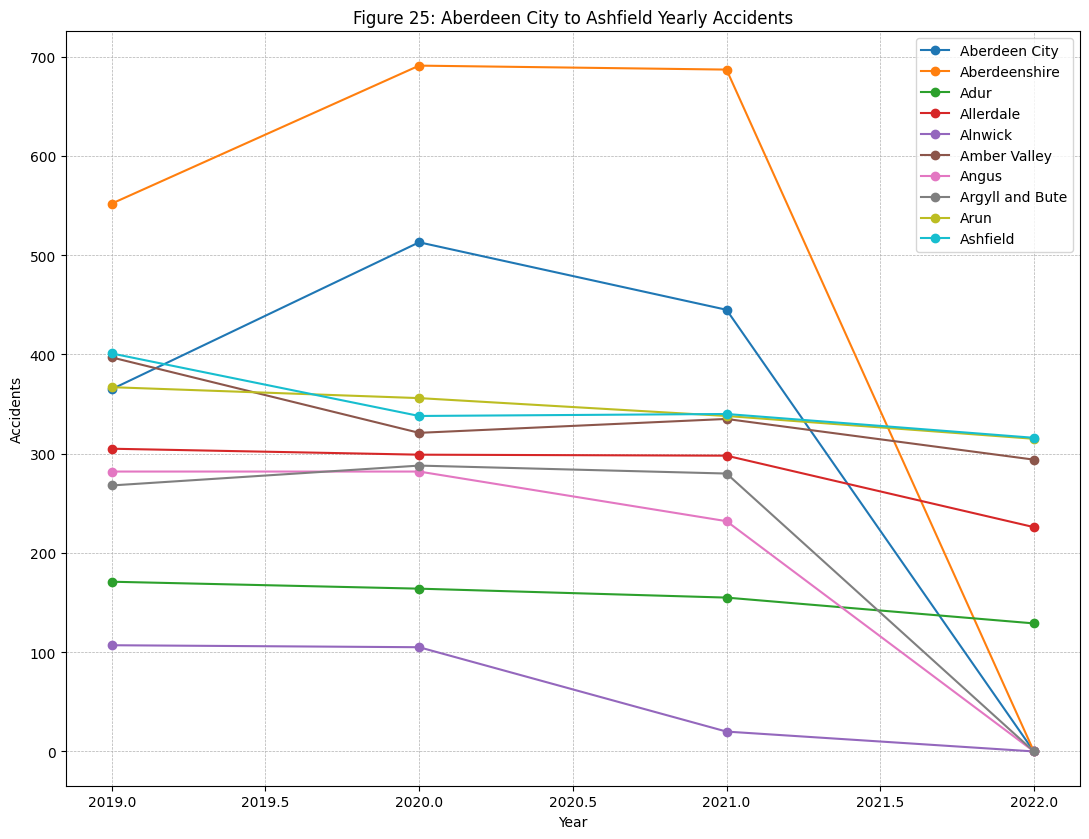

In [172]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label=x, marker='o')
    if count == 10:
        break

plt.gcf().set_size_inches(11, 8.5)
plt.title('Figure 25: Aberdeen City to Ashfield Yearly Accidents')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()